In [1]:
import pickle

In [2]:
import pandas as pd

In [20]:
marked_essays = pd.read_csv('files/marked_essays_v1.csv', header=1)
marked_essays

,essay id,Has the student written a compelling opening?,Has the student 'shown' and not 'told'?,Has the student used a range of literary devices?,Has the student made an effort to create dynamic characters?,Has the student established a sense of setting?,Has the student varied their sentence structure?,Has the student varied their sentence length?,Has the student written a story that follows the narrative arc?,Has the student engaged with the prompt?,Has the student included dialogue?,Has the student followed the rules of using dialogue? (1. speech marks 2. new speaker new line 3. punctuation before closing speech marks 4. speech tags).,Has the student used paragraphs?,Has the student used the five senses in their writing?
0,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3,3.0
1,2,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3,2.0
2,3,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2,0.0
3,4,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3,1.0
4,5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0.0
75,76,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2,1.0
76,77,2.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,3.0,2.0,2,2.0
77,78,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,2,0.0


In [6]:
all_answers = pickle.load(open('answer_dump.pckl','rb'))

all_questions = pickle.load(open('questions_dump.pckl','rb'))

all_essays = pickle.load(open('essays_dump.pckl','rb'))


In [21]:
essay_str_list = [int(e[0][:-5][-2:]) for e in all_essays]

In [40]:
marked_essays[marked_essays['essay id']==essat_id].iloc[0]

essay id                                                                                                                                                       24
Has the student written a compelling opening?                                                                                                                 1.0
Has the student 'shown' and not 'told'?                                                                                                                       1.0
Has the student used a range of literary devices?                                                                                                             1.0
Has the student made an effort to create dynamic characters?                                                                                                  1.0
Has the student established a sense of setting?                                                                                                               1.0
Has the student varied their

In [43]:
marked_essays[marked_essays['essay id']==essat_id].iloc[0][0]

24

In [54]:
all_parsed_answers = []
for a in all_answers:
    essat_id = essay_str_list[a[0]]
    #print('hi', essat_id)
    #print(a[1],all_questions[a[1]])
    #print(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]], a[3]['choices'][0]['text'])
    all_parsed_answers.append((a[0],a[1],int(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]]), int(a[3]['choices'][0]['text'][:2])))
    #print(essat_id, marked_essays[marked_essays['essay id']==essat_id][0])
    #break

In [55]:
differences = [abs(a[-2]-a[-1]) for a in all_parsed_answers]

In [56]:
from matplotlib import pyplot as plt

(array([103.,   0.,   0., 217.,   0.,   0., 282.,   0.,   0.,  74.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

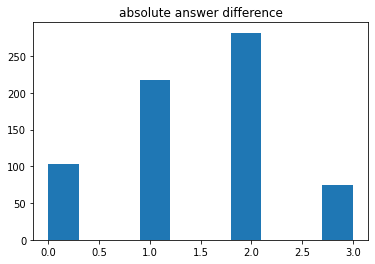

In [63]:
plt.title('absolute answer difference')
plt.hist(differences)

In [72]:
current = -1 #essayid
accumulated_variances = []
current_value = -1
for a in all_parsed_answers:
    if a[0] != current:
        accumulated_variances.append(current_value)
        current = a[0]  
        current_value = 0
    current_value += abs(a[-2]-a[-1])

In [77]:
import numpy as np

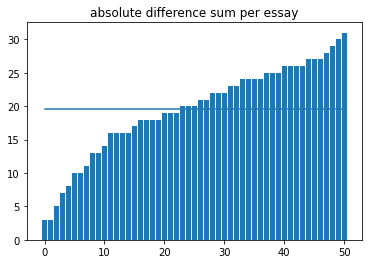

In [78]:
plt.title('absolute difference sum per essay')
plt.bar(list(range(51)), sorted(accumulated_variances[1:]))
plt.plot([0,50],[np.average(accumulated_variances[1:])]*2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa06bfc8040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa06bfd79a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa06bfd7250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa06bfd7f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa06bfe3250>],
 'means': []}

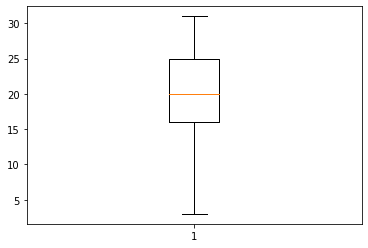

In [75]:
plt.boxplot(accumulated_variances[1:])

In [79]:
current = -1 #questionid
accumulated_variances = [0]*13
accumulated_variances_list = {k:[] for k in range(13)}

for a in all_parsed_answers:
    accumulated_variances_list[a[1]].append(abs(a[-2]-a[-1]))

In [67]:
accumulated_variances

[89, 83, 65, 66, 78, 77, 100, 78, 75, 78, 80, 61, 73]

<BarContainer object of 13 artists>

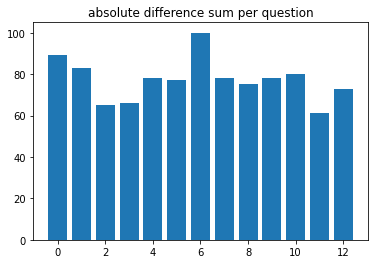

In [81]:
plt.title('absolute difference sum per question')
plt.bar(list(range(13)), [sum(accumulated_variances_list[k]) for k in accumulated_variances_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa06bc95ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa06bca6280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa06bd07880>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa06bca6820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa06bca6af0>,
 'means': []}

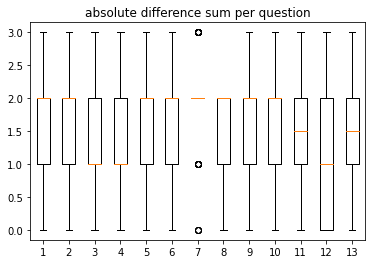

In [84]:
plt.title('absolute difference sum per question')
plt.boxplot([accumulated_variances_list[k] for k in accumulated_variances_list])